In [181]:
# Import the datetime module to work with date and time
import datetime  

# Import the sqlite3 module to interact with the SQLite database
import sqlite3

# Print the current date and time, for test if it works or not
print(f"Current time is: {datetime.datetime.now()}, Task Scheduler executed successfully!")


Current time is: 2024-09-27 19:01:51.381246, Task Scheduler executed successfully!


In [183]:
# Import the logging module to set up logging configuration
import logging  

# Set up logging configuration
logging.basicConfig(
    filename=r'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\task_log.txt',  # Path to the log file
    level=logging.INFO,  # Set logging level to INFO to also log successful execution
    format='%(asctime)s - %(levelname)s - %(message)s'  # Log format including timestamp, log level, and message
)

# Log the start of the task
logging.info('Task started')

try:
    # Simulate potential code execution
    current_time = datetime.datetime.now()
    print(f"Current time is: {current_time}, Task Scheduler executed successfully!")
    
    # Log successful execution
    logging.info(f"Task executed successfully at {current_time}")

except Exception as e:
    # Catch any exceptions and log them to the log file
    logging.error(f"An error occurred during task execution: {e}")
    print("An error occurred during task execution. Please check the log file for details.")


Current time is: 2024-09-27 19:01:52.288553, Task Scheduler executed successfully!


In [185]:
# test if logging be worked 
try:
    # Simulate a runtime error (division by zero)
    result = 10 / 0  # This will raise an exception
    current_time = datetime.datetime.now()
    print(f"Current time is: {current_time}, Task Scheduler executed successfully!")
    
except Exception as e:
    # Log the error
    logging.error(f"An error occurred: {e}")
    print("An error occurred during task execution. Please check the log file for details.")


An error occurred during task execution. Please check the log file for details.


In [115]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [187]:
# Import pandas for reading and printing CSV
import pandas as pd
import os

# Set up logging
logging.basicConfig(
    filename=r'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\task_log.txt',
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Change directory to the working directory
try:
    os.chdir(r"D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2")
    print("Current working directory after change:", os.getcwd())
    logging.debug("Changed to directory: " + os.getcwd())
except Exception as e:
    logging.error(f"Failed to change directory: {e}")
    raise

# Step 1: Read and print the original CSV data with Excel-like formatting
try:
    print("Step 1: Reading and printing the original CSV file...")
    logging.debug("Step 1: Reading and printing the original CSV file...")
    
    original_data = pd.read_csv(r'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\test_data.csv')

    # Print CSV content with formatted output (first 10 rows)
    print("\nOriginal CSV data (first 10 rows):\n")
    print(original_data.head(10).to_string(index=False))  # Display first 10 rows without the index
    
    logging.debug(f"Original data loaded: {original_data.shape[0]} rows, {original_data.shape[1]} columns")

except FileNotFoundError as e:
    logging.error(f"File not found: {e}")
    print(f"File not found: {e}")
except Exception as e:
    logging.error(f"An error occurred while reading the original CSV: {e}")
    print(f"An error occurred while reading the original CSV: {e}")


Current working directory after change: D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2
Step 1: Reading and printing the original CSV file...

Original CSV data (first 10 rows):

 year industry_code_ANZSIC              industry_name_ANZSIC rme_size_grp                                        variable value              unit
 2011                    A Agriculture, Forestry and Fishing          a_0                                   Activity unit 46134             COUNT
 2011                    A Agriculture, Forestry and Fishing          a_0                          Rolling mean employees     0             COUNT
 2011                    A Agriculture, Forestry and Fishing          a_0                         Salaries and wages paid   279 DOLLARS(millions)
 2011                    A Agriculture, Forestry and Fishing          a_0 Sales, government funding, grants and subsidies  8187 DOLLARS(millions)
 2011                    A

In [189]:
# Set up logging to capture all information in the log file
logging.basicConfig(
    filename=r'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\task_log.txt',
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Step 1: Read the CSV file again to start processing
try:
    print("Step 1: Reading the CSV file for processing...")
    logging.debug("Step 1: Reading the CSV file for processing...")
    data = pd.read_csv(r'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\test_data.csv')
    print(f"Data loaded: {data.shape[0]} rows, {data.shape[1]} columns")
    logging.debug(f"Data loaded: {data.shape[0]} rows, {data.shape[1]} columns")

    # Step 2: Convert 'year' to datetime
    print("Step 2: Converting 'year' to datetime...")
    logging.debug("Step 2: Converting 'year' to datetime...")
    data['date'] = pd.to_datetime(data['year'], format='%Y')
    data.set_index('date', inplace=True)

    # Step 3: Resample the data by quarter
    print("Step 3: Resampling data by quarter...")
    logging.debug("Step 3: Resampling data by quarter...")
    quarterly_data = data.resample('QE-DEC').sum()
    print(f"Quarterly data: {quarterly_data.shape[0]} rows, {quarterly_data.shape[1]} columns")
    logging.debug(f"Quarterly data: {quarterly_data.shape[0]} rows, {quarterly_data.shape[1]} columns")

    # Step 4: Save the data to CSV
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    output_path = rf'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\quarterly_summary_{timestamp}.csv'
    print(f"Saving results to {output_path}...")
    logging.debug(f"Saving results to {output_path}...")
    quarterly_data.to_csv(output_path)

    print("Step 4: All steps completed successfully!")
    logging.debug("Step 4: All steps completed successfully!")

    # Step 5: Update SQL database with new data
    print("Step 5: Updating SQL database...")
    logging.debug("Step 5: Updating SQL database...")

    # Connect to the SQLite database and ensure the table exists
    conn = sqlite3.connect(r'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\test1.db')
    cursor = conn.cursor()

    # Create table if not exists
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS industry_data (
        year INTEGER,
        industry_code_ANZSIC TEXT,
        industry_name_ANZSIC TEXT,
        rme_size_grp TEXT,
        Salaries_and_wages_paid REAL,
        Total_income REAL,
        Total_expenditure REAL
    )
    ''')

    # Insert new data or update existing data
    for index, row in quarterly_data.iterrows():
        cursor.execute("""
        INSERT OR REPLACE INTO industry_data (year, industry_code_ANZSIC, industry_name_ANZSIC, rme_size_grp, Salaries_and_wages_paid, Total_income, Total_expenditure)
        VALUES (?, ?, ?, ?, ?, ?, ?)
        """, (row['year'], row['industry_code_ANZSIC'], row['industry_name_ANZSIC'], row['rme_size_grp'], 
              row['Salaries and wages paid'], row['Total income'], row['Total expenditure']))

    # Commit changes and close connection
    conn.commit()
    conn.close()

    print("SQL database updated successfully!")
    logging.debug("SQL database updated successfully!")

except FileNotFoundError as e:
    logging.error(f"File not found: {e}")
    print(f"File not found: {e}")
except Exception as e:
    logging.error(f"An error occurred: {e}")
    print(f"An error occurred: {e}")


Step 1: Reading the CSV file for processing...
Data loaded: 20124 rows, 7 columns
Step 2: Converting 'year' to datetime...
Step 3: Resampling data by quarter...
Quarterly data: 49 rows, 7 columns
Saving results to D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\quarterly_summary_20240927_190201.csv...
Step 4: All steps completed successfully!
Step 5: Updating SQL database...
An error occurred: 'Salaries and wages paid'


In [191]:
# Connect to the SQLite database again to check if renew databas right or not
conn = sqlite3.connect(r'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\test1.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute an SQL query to retrieve all data from the 'industry_data' table
cursor.execute("SELECT * FROM industry_data")

# Fetch all the results from the executed query and print them
rows = cursor.fetchall()

# Print each row of the fetched data
for row in rows:
    print(row)

# Close the database connection after use
conn.close()


(2011, 'A', 'Agriculture, Forestry and Fishing', 'a_0', 279.0, 7618.0, 8866.0)
(2011, 'A', 'Agriculture, Forestry and Fishing', 'b_1-5', 1435.0, 12316.0, 13771.0)
(2011, 'A', 'Agriculture, Forestry and Fishing', 'c_6-9', 467.0, 2895.0, 3114.0)
(2011, 'A', 'Agriculture, Forestry and Fishing', 'd_10-19', 477.0, 2344.0, 2438.0)
(2011, 'A', 'Agriculture, Forestry and Fishing', 'e_20-49', 410.0, 1773.0, 1885.0)
(2011, 'A', 'Agriculture, Forestry and Fishing', 'f_50-99', 200.0, 1056.0, 1170.0)
(2011, 'A', 'Agriculture, Forestry and Fishing', 'g_100-199', 86.0, 333.0, 364.0)
(2011, 'A', 'Agriculture, Forestry and Fishing', 'h_200+', 173.0, 850.0, 1034.0)
(2011, 'A', 'Agriculture, Forestry and Fishing', 'i_Industry_Total', 3527.0, 29185.0, 32642.0)
(2011, 'B', 'Mining', 'a_0', 98.0, 1673.0, 2271.0)
(2011, 'B', 'Mining', 'b_1-5', 50.0, 411.0, 462.0)
(2011, 'B', 'Mining', 'c_6-9', 12.0, 68.0, 65.0)
(2011, 'B', 'Mining', 'd_10-19', 31.0, 239.0, 265.0)
(2011, 'B', 'Mining', 'e_20-49', 59.0, 490.0,

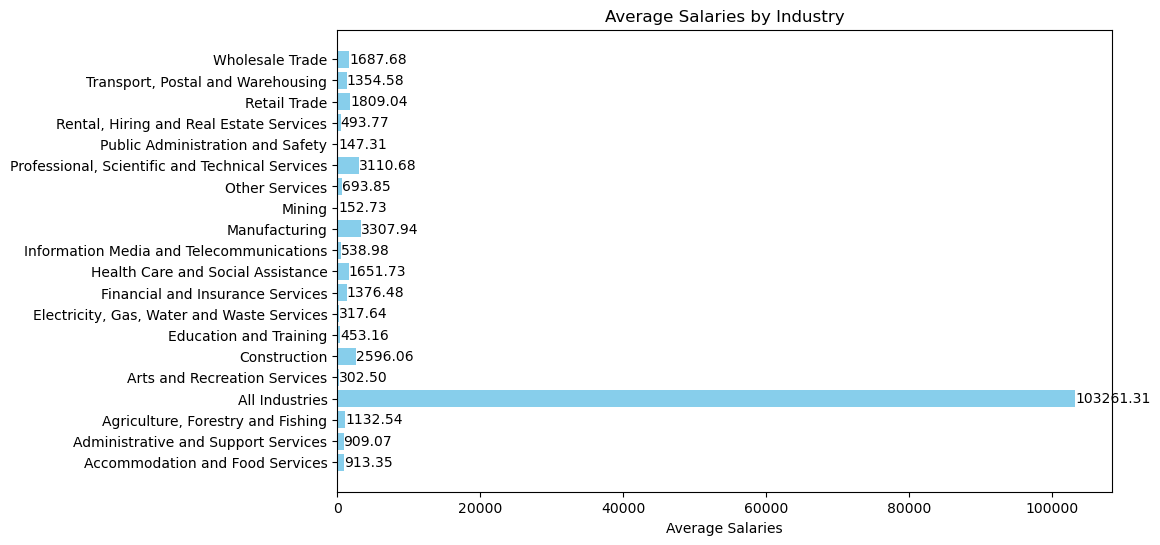

In [193]:
import matplotlib.pyplot as plt
# Connect to the SQLite database
conn = sqlite3.connect(r'D:\Lenovo lektions backup files 2024-07\EC-utbildning\2024-V.35 Fordjupad Pythonprogrammering\Kunskapskontroll 2\test1.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute an SQL query to retrieve industry names and average salaries
cursor.execute("SELECT industry_name_ANZSIC, AVG([Salaries and wages paid]) FROM industry_data GROUP BY industry_name_ANZSIC")

# Fetch the results
rows = cursor.fetchall()

# Close the database connection after fetching data
conn.close()

# Prepare the data for plotting
industry_names = [row[0] for row in rows]  # Extract industry names
average_salaries = [row[1] for row in rows]  # Extract average salaries

# Create the plot with actual industry data
plt.figure(figsize=(10, 6))
bars = plt.barh(industry_names, average_salaries, color='skyblue')
plt.xlabel('Average Salaries')
plt.title('Average Salaries by Industry')

# Add labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the plot before showing it
plt.savefig(f"D:/Lenovo lektions backup files 2024-07/EC-utbildning/2024-V.35 Fordjupad Pythonprogrammering/Kunskapskontroll 2/average_salaries_by_industry_{timestamp}.png")

# Optionally display the plot
plt.show()
